In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset


Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
 99% 777M/787M [00:03<00:00, 161MB/s]
100% 787M/787M [00:03<00:00, 219MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/kaggle-cat-vs-dog-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 98% 761M/775M [00:06<00:00, 46.6MB/s]
100% 775M/775M [00:06<00:00, 125MB/s] 


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-and-cat-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [15]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    "/content/kagglecatsanddogs_3367a/PetImages",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
).apply(tf.data.experimental.ignore_errors())

validation_ds = keras.utils.image_dataset_from_directory(
    "/content/kagglecatsanddogs_3367a/PetImages",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
).apply(tf.data.experimental.ignore_errors())


Found 24959 files belonging to 2 classes.
Using 19968 files for training.


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Found 24959 files belonging to 2 classes.
Using 4991 files for validation.


In [16]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [24]:
# Create CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 56s 91ms/step - accuracy: 0.9202 - loss: 0.1690 - val_accuracy: 0.7862 - val_loss: 0.6924
Epoch 2/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9273 - loss: 0.1484 - val_accuracy: 0.8113 - val_loss: 0.7531
Epoch 3/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 88s 143ms/step - accuracy: 0.9364 - loss: 0.1411 - val_accuracy: 0.8237 - val_loss: 0.7273
Epoch 4/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 107s 87ms/step - accuracy: 0.9395 - loss: 0.1370 - val_accuracy: 0.7724 - val_loss: 1.0442
Epoch 5/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 54s 88ms/step - accuracy: 0.9443 - loss: 0.1270 - val_accuracy: 0.8263 - val_loss: 0.6679
Epoch 6/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 54s 88ms/step - accuracy: 0.9509 - loss: 0.1151 - val_accuracy: 0.8345 - val_loss: 0.7648
Epoch 7/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.9496 - loss: 0.1155 - val_accuracy: 0.8219 - val_loss: 0.8500
Epoch 8/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9509 - loss: 0.1131 

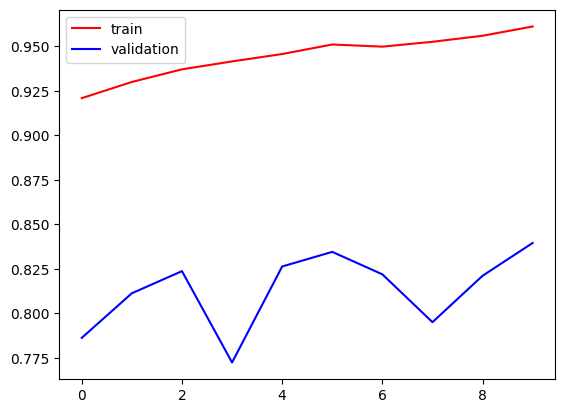

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

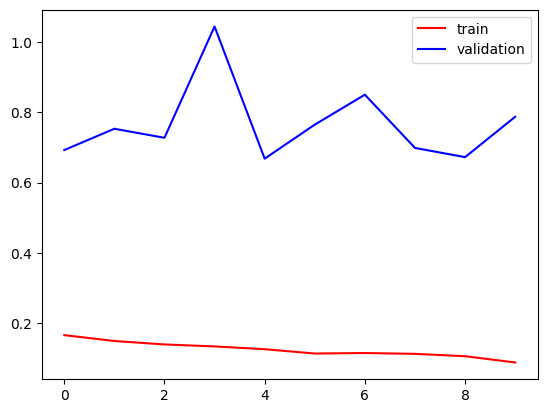

In [30]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# wyas to reduce overfitting

#1. Add more data
#2. data Augmentation
#3. L1/L2 Regularizer
#4. Drouput
#5. Batch Normalization
#6. Reduce Complexity